<a href="https://colab.research.google.com/github/Max640a/ChyselniMetody_lab/blob/main/%D0%9B%D0%A013_%D0%92%D0%BE%D1%80%D0%BE%D0%BD%D1%8E%D0%BA_%D0%92%D0%B0%D1%80%D1%96%D0%B0%D0%BD%D1%824.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Лабораторна робота 13.

#Метод Ейлера

x = [0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5] 
y = [0.6    0.7474 0.9035 1.0677 1.2397 1.4189 1.6049 1.797  1.9948 2.1977
 2.4052]


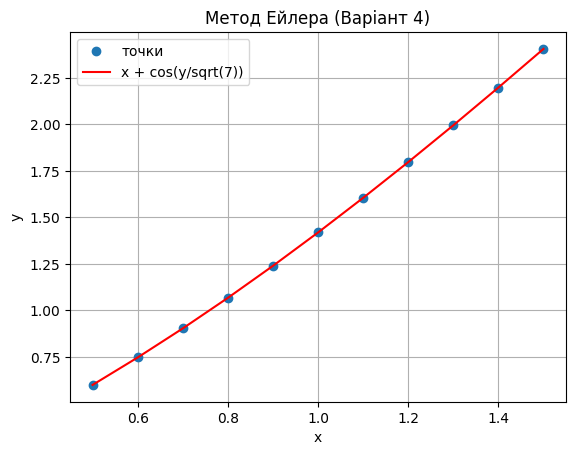

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Функція f(x, y) для Варіанту 4а
def f(x, y):
    return x + np.cos(y / np.sqrt(7))

# Вводимо параметри: a=0.5, b=1.5, h=0.1, y0=0.6
a, b, h, y0 = 0.5, 1.5, 0.1, 0.6

# Перевірка вхідних параметрів
if h <= 0:
    print("Крок h повинен бути позитивним.")
    exit()
if a >= b:
    print("Права межа b повинна бути більшою за ліву межу a.")
    exit()

# Кількість кроків
n = int(round((b - a) / h))

# Задаємо x
x = np.array([a + i * h for i in range(n + 1)])

y = np.empty(n + 1)
y[0] = y0

# Основний цикл методу Ейлера
for i in range(n):
    y[i + 1] = y[i] + f(x[i], y[i]) * h
y_rounded = np.round(y, 4)
print("x =", x, "\ny =", y_rounded)

# Побудова графіка
plt.plot(x, y, "o", x, y, "red")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Метод Ейлера (Варіант 4)")
plt.legend(["точки", "x + cos(y/sqrt(7))"])
plt.grid()
plt.show()

------------------------------
Перевірка odeint:
x = [0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5]
y = [0.6    0.7517 0.9118 1.0798 1.2552 1.4376 1.6263 1.8208 2.0206 2.2251
 2.4337]


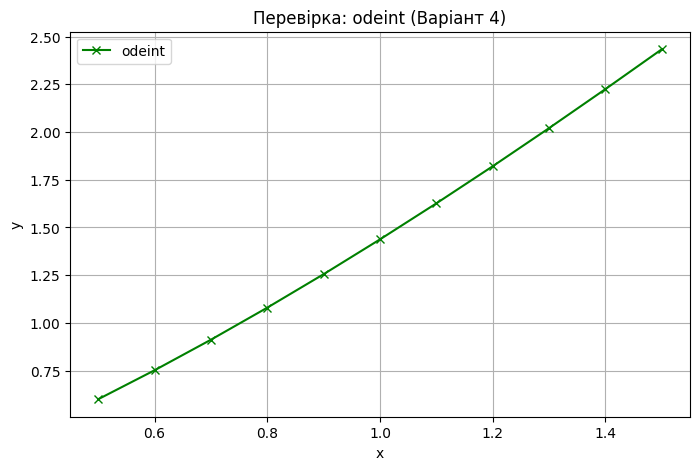

In [ ]:
# --- Додати перевірку odeint для першого завдання ---
from scipy.integrate import odeint

# Функція для odeint (важливо: порядок аргументів y, x)
def model_odeint(y, x):
    return x + np.cos(y / np.sqrt(7))

# Параметри Варіанту 4
y0 = 0.6
x_ode = np.linspace(0.5, 1.5, 11) # 11 точок, щоб крок був 0.1

# Розв'язання
y_ode = odeint(model_odeint, y0, x_ode)

# Виведення результатів
print("-" * 30)
print("Перевірка odeint:")
print("x =", x_ode)
print("y =", np.round(y_ode.flatten(), 4))

# Додавання графіку odeint на існуючий (або новий)
plt.figure(figsize=(8, 5))
plt.plot(x_ode, y_ode, label='odeint', color='green', marker='x')
# plt.plot(x, y, label='Метод Ейлера', color='red', marker='o')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Перевірка: odeint (Варіант 4)")
plt.legend()
plt.grid()
plt.show()


------------------------------
Перевірка solve_ivp:
x = [0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5]
y = [0.6    0.7517 0.9119 1.0799 1.2553 1.4376 1.6262 1.8207 2.0205 2.2251
 2.4337]


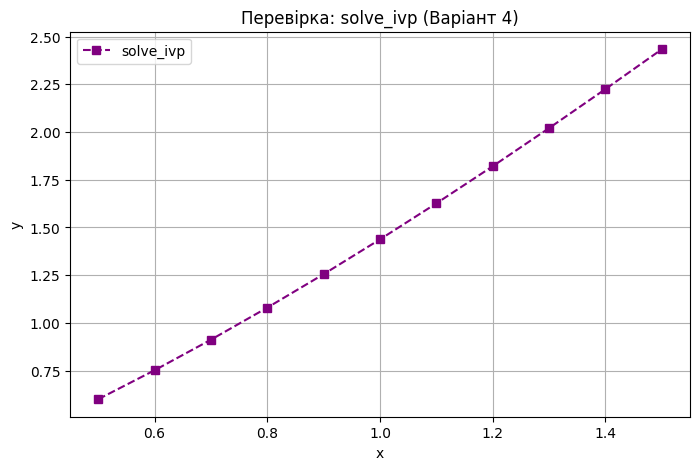

In [ ]:
# --- Додати перевірку solve_ivp для першого завдання ---
from scipy.interpolate import interp1d
from scipy.integrate import solve_ivp

# Функція для solve_ivp (важливо: порядок аргументів x, y)
def model_ivp(x, y):
    return x + np.cos(y / np.sqrt(7))

# Параметри
t_span = [0.5, 1.5]
y0_ivp = [0.6]
t_eval = np.linspace(0.5, 1.5, 11) # Точки, де ми хочемо знати відповідь

# Розв'язання
sol = solve_ivp(model_ivp, t_span, y0_ivp, t_eval=t_eval)

# Виведення результатів
print("-" * 30)
print("Перевірка solve_ivp:")
print("x =", sol.t)
print("y =", np.round(sol.y[0], 4))

# Графік
plt.figure(figsize=(8, 5))
plt.plot(sol.t, sol.y[0], label='solve_ivp', color='purple', linestyle='--', marker='s')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Перевірка: solve_ivp (Варіант 4)")
plt.legend()
plt.grid()
plt.show()

#Метод Ейлера-Коші

x = [1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7] 
y = [5.3    5.4609 5.6267 5.7972 5.9725 6.1524 6.337  6.5262 6.72   6.9186
 7.1221]


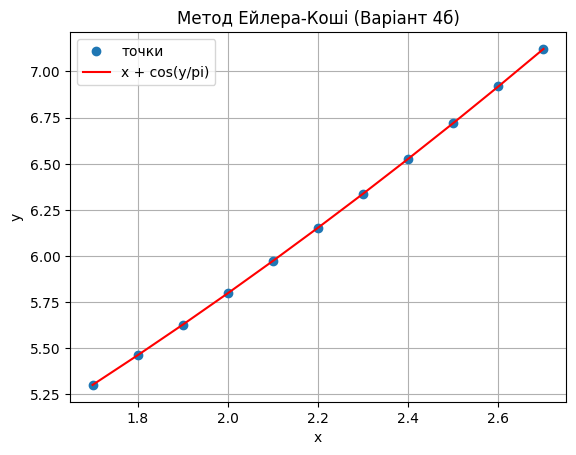

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Функція для Варіанту 4
def f(x, y):
    return x + np.cos(y / np.pi)

a = 1.7  # ліва межа відрізку
b = 2.7  # права межа відрізку
h = 0.1  # крок
y0 = 5.3 # початкова умова

# Обчислюємо кількість кроків (використовуємо round для точності)
n = int(round((b - a) / h))

# Генерація x (використовуємо linspace для точного попадання в межі)
x = np.linspace(a, b, n + 1)

y = np.empty(n + 1)
y[0] = y0

# Метод Ейлера-Коші
for i in range(n):
    # Використовується середнє значення нахилу (предиктор-коректор)
    # k1 = f(x[i], y[i])
    # k2 = f(x[i+1], y[i] + h * k1)
    # y[i+1] = y[i] + (k1 + k2) * h / 2

    current_slope = f(x[i], y[i])
    next_predictor = y[i] + h * current_slope
    next_slope = f(x[i + 1], next_predictor)

    y[i + 1] = y[i] + (current_slope + next_slope) * h / 2

# Замінено застарілий np.round_ на np.round
y_rounded = np.round(y, 4)

print("x =", x, "\ny =", y_rounded)

# Візуалізація
plt.plot(x, y, "o", x, y, "red")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Метод Ейлера-Коші (Варіант 4б)")
plt.legend(["точки", "x + cos(y/pi)"])
plt.grid()
plt.show()

#Розв’язок диф. Рівняння за допомогою scipy.integrate import odeint

x= [1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7]
y= [5.3        5.46087705 5.62662954 5.79716059 5.97239628 6.15228751
 6.33681129 6.52597279 6.7198069  6.91837986 7.12179202]


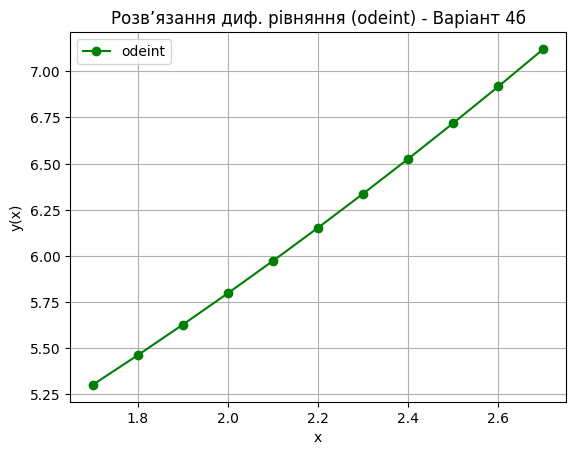

In [ ]:
# Розв’язок диф. Рівняння за допомогою scipy.integrate import odeint
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Функція, що повертає dy/dx
def model(y, x):
    return x + np.cos(y / np.pi)

# Початкова умова (Варіант 4б)
y0 = 5.3

# Значення x (від 1.7 до 2.7 з кроком 0.1)
# Використовуємо linspace для точного генерування 11 точок
x = np.linspace(1.7, 2.7, 11)

# Розв'язання ODE
y = odeint(model, y0, x)

# Виведення результатів
print('x=', x)
print('y=', y.flatten())  # Перетворення в одновимірний масив для виводу

# Побудова графіка результатів
plt.plot(x, y, marker='o', label='odeint', color='green')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Розв’язання диф. рівняння (odeint) - Варіант 4б')
plt.legend()
plt.grid()
plt.show()

#Використання scipy.integrate.solve_ivp
Функція solve_ivp є більш сучасним і гнучким способом розв'язання ODE, ніж odeint. Вона також дозволяє використовувати різні методи інтегрування.

x= [1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7]
y= [5.3        5.46087697 5.62663179 5.79716857 5.97240697 6.15229586
 6.3368138  6.52596906 6.71979962 6.91837318 7.12178711]


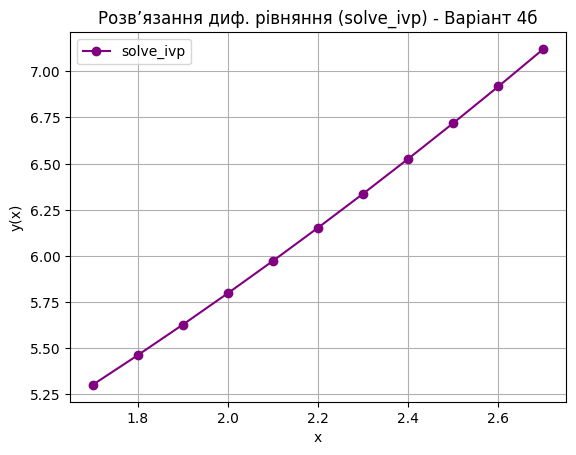

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Функція, що повертає dy/dx (Варіант 4б)
def model(x, y):
    return x + np.cos(y / np.pi)

# Початкова умова
y0 = [5.3]  # Потрібно передати як список

# Значення x (інтервал [1.7; 2.7], 11 точок для кроку 0.1)
x = np.linspace(1.7, 2.7, 11)

# Розв'язання ODE
# [1.7, 2.7] - це межі інтегрування (t_span)
sol = solve_ivp(model, [1.7, 2.7], y0, t_eval=x)

# Виведення результатів
print('x=', sol.t)
print('y=', sol.y[0])

# Побудова графіка результатів
plt.plot(sol.t, sol.y[0], marker='o', label='solve_ivp', color='purple')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Розв’язання диф. рівняння (solve_ivp) - Варіант 4б')
plt.legend()
plt.grid()
plt.show()